# Exercício

# Classificação - Dados tabulares

**Exercício: Classificação se um paciente possui diabetes**

**Arquivo diabetes.csv**

**Passos:**

1. Carregue o conjunto de dados em um DataFrame usando a biblioteca pandas.
2. Explore e visualize os dados para entender suas características.
3. Divida os dados em recursos (X) e rótulos (y).
4. Divida o conjunto de dados em conjuntos de treinamento e teste.
5. Utilização de redes neurais scikit-learn `MLPClassifier`:
   1. Inicialize o modelo de redes neurais.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
6. Utilização de redes neurais keras `Sequential`:
   1. Inicialize o modelo de redes neurais.
   2. Divida o treino em conjuntos de treinamento e validação.
   3. Treine o modelo usando o conjunto de treinamento e valide utilizando o conjunto de validação.
   4. Verifique se houve overfitting
   5. Faça previsões usando o conjunto de teste.
   6. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.  
7. Utilização do Random Forest `RandomForestClassifier`:
   1. Inicialize o modelo de Ensemble de árvore.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
8. Utilização do XGBoost `XGBClassifier`:
   1. Inicialize o modelo de Ensemble de árvore.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
   5. Verifique a importância dos atributos.

# Classificação - Imagem

**Classificação de tipos de tumores**

**Imagens na pasta Datasets/Exercicio_Tumores**

**Passos:**

1. Carregue o conjunto de imagens.
2. Realize o pre processamento.
3. Divida os dados em recursos (X) e rótulos (y).
4. Divida o conjunto de dados em conjuntos de treinamento, validação e teste.
5. Treinamento: 
   1. Definição de arquitetura:
      1. Definir quantas camadas são necessárias para o problema
      2. A quantidade de neurônios em cada camada.
      3. A função de ativação de cada camada.
      4. Regularização - dropout.
      5. A função de ativação da saída.
         * softmax (saída não binária).
         * sigmoid (saída binária).
   2. `.compile`: Definição dos otimizadores.
   3. Regularização - earlystop.
   4. `.fit`: Adicionar conjuntos de treinamento e validação; e determinar a quantidade de épocas.
6. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc. 

# Prática - Tumor

In [15]:
import pathlib
import cv2
import os
import matplotlib.pyplot as plt

#### 1. Aquisição dos dados


In [4]:
path = '../../Datasets/Exercicio_Tumores'
data = pathlib.Path(path)

In [5]:
data

WindowsPath('../../Datasets/Exercicio_Tumores')

In [9]:
list(data.glob('*/*.jpg'))[:2]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg')]

In [10]:
list(data.glob('glioma_tumor/*.jpg'))[:5]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_100.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_101.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_102.jpg')]

In [11]:
disease = {
    "glioma_tumor": list(data.glob('glioma_tumor/*.jpg')),
    "meningioma_tumor": list(data.glob('meningioma_tumor/*.jpg')),
    "normal": list(data.glob('normal/*.jpg')),
    "pituitary_tumor" : list(data.glob('pituitary_tumor/*.jpg')),       
}

In [12]:
disease.keys()

dict_keys(['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor'])

In [13]:
labels = {
    "glioma_tumor" : 0,
    "meningioma_tumor":1,
    "normal":2,
    "pituitary_tumor":3
}

In [16]:
os.listdir(path)

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

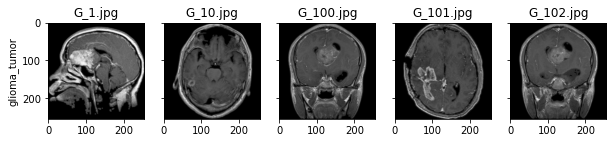

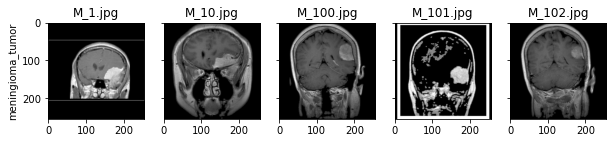

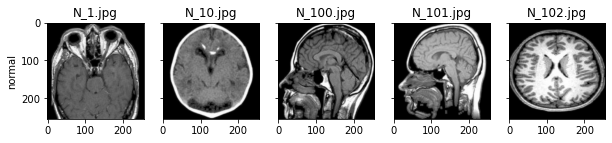

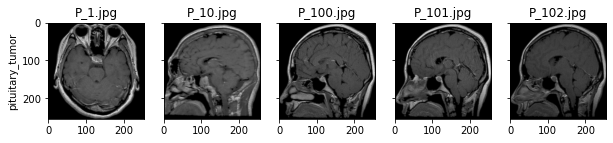

In [28]:
directory = os.listdir(path)

for each in disease.keys():
    plt.figure(figsize=(10, 10))
    currentFolder = path + '/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = path + '/' + each + "/" + file
        img=cv2.imread(fullpath)
        ax=plt.subplot(1,5,i+1)
        ax.set_title(file)
        if(i == 0):
            ax.set_ylabel(each)
        else:
            ax.set_yticklabels([])
        plt.imshow(img)

## Carregamento dos dados

In [29]:
X = []
Y = []
for name, diseases in disease.items():
    for disease in diseases:
        img = cv2.imread(str(disease))
        img = img.astype('float32') / 255.0
        X.append(img)
        Y.append(labels[name])     